<img src="https://s3.amazonaws.com/ByC_logo_prod/unit-26963.jpg" alt="Alt text that describes the graphic" width="600" />

# Predicting The Price of Used Cars

### by Shelley Wenzel

#### June 25, 2020

# Table of contents

- [Abstract](#Abstract)
- [Introduction](#Introduction)
- [1. The problem](#1.-The-problem)
- [2. Purpose of the study](#2.-Purpose-of-the-study)
- [3. Project description](#3.-Project-description)
    - [3.1 Hypothesis](#3.1-Hypothesis)
    - [3.2 Workflow](#3.2-Workflow)
    - [3.3 Methods](#3.3-Methods)
    - [3.4Analysis](#3.4-Analysis)
    - [3.5 Results](#3.5-Results)
- [4. Implementation (optional)](#4.-Implementation-(optional))
- [Conclusion](#Conclusion)
- [References](#References)

##  Abstract

Chances are that you have had some life experience involving buying or selling a used car. Whether you have purchased a used car, sold your used car, or traded in your used car to a dealership, you have probably wondered: what factors determine how your car is valued? Using public data from Kaggle.com (Kaggle), a dataset containing all used vehicles listings for sales on Craigslist.com in the United States was cleaned and analyzed to answer this question. The uncleaned dataset had 25 features, which were edited down to 13.

## Introduction

This project looks at using data from used car listings to see what, if any, features of a used vehicle can be used to determine the listing price of that car. A dataset from Kaggle.com titled 'Used Cars Dataset - Vehicle Listings From Craigslist.com' was utilized for this project (Kaggle). This very large dataset in its uncleaned form has over 435,849 data entries and 25 columns of unique features relating the vehicle listed. The raw data can be seen below.

There were lots of NaN values throughout the dataset, so cleaning the data was an incredibly important first step. Once the data was cleaned and all NaN values were either filled or the row entry was eliminated, the data was explored. After the data exploration followed multiple linear regression and multiple linear regression with interactions analyses and then machine learning models in order to see if the price could be predicted using the car's features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("vehicles.csv")

In [3]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
id              435849 non-null int64
url             435849 non-null object
region          435849 non-null object
region_url      435849 non-null object
price           435849 non-null int64
year            434732 non-null float64
manufacturer    415102 non-null object
model           429650 non-null object
condition       249043 non-null object
cylinders       269465 non-null object
fuel            432858 non-null object
odometer        360701 non-null float64
title_status    434043 non-null object
transmission    433703 non-null object
vin             239197 non-null object
drive           313838 non-null object
size            139888 non-null object
type            318741 non-null object
paint_color     300602 non-null object
image_url       435825 non-null object
description     435822 non-null object
county          0 non-null float64
state           435849 non-null obj

## 1. The problem

There is a potentially endless list of car features to take into consideration when analyzing the worth of a used car, such as:

- What's the gas miles per gallon (mpg)?
- How many miles are already on the car?
- Has the car been in an accident?
- Hold old is the car?
- Where, geographically, did the car live for most of it's life? Was it run in snow?
- What color is the car?
- Is the transmission manual or automatic?
- Is the drive type a front-wheel drive, rear-wheel drive, or all-wheel drive?
- How many doors does the car have?
- How many people owned this car?
- How often was the car serviced?

Collecting meangingful data on this topic is quite an undertaking, especially with all the potential meaningful factors to analyze. There are also many different ways to buy and sell a car, such as in person at a local dealer or online on one of the many websites that compete in this field: AutoTrader, Cars.com, eBay Motors, Hemmings, Facebook Marketplace, CarGurus, TrueCar, Craigslist, Carvana, Bring-A-Trailer, Vroom, CarMax, and AutoTempest (Montway). 

[Back to top](#Table-of-contents)

## 2. Purpose of the study

According to an article on Bloomberg.com from 2015, about 88% of Americans own a car (Bloomberg). Another article from The Motley Fool lists transportation as the number two highest expenditure category, second only to housing (Fool). With so much money being spent on cars in the United States, using data to bring knowledge to the used vehicle market would be almost universally helpful to the average American. Whether you are buying a used car, selling your used car, or trading in your used vehicle to a dealership, this information can help make an informed decision on what your car is worth. 

Personally, I have purchased and sold three used cars within the last decade alone, so I have a particular desire to explore the relationships between car features and selling price. I sold the most recent car in October 2019 in advance of my move to Australia; now that I am back in the United States, I will be looking to buy a used vehicle in the upcoming months. I want to understand what features to look for, to make sure I am getting a car at a fair, market price. What car features are most important when determining price? What factors, if any, are unimportant? This study aims to address these questions.

[Back to top](#Table-of-contents)

## 3. Project description

Using public data regarding used car sales on Craigslist in the United States, this project aims to analyze which features are significant when setting the price of a vehicle. This study looks at the United States used car market only. The focus is on the average American car buyer, so niche markets like motorcycles, trailers, motorhomes, etc. will not be used for this study. We also want to make sure this excludes extreme outliers that could skew the data, such as very old classic cars, high-end luxury cars, and brand new cars being sold on Craigslist.

[Back to top](#Table-of-contents)

### 3.1 Hypothesis

Can data science techniques and methods be used to find significance in certain used car features in order to explain or predict the listed selling prices of these vehicles? My hypothesis is the variable 'mileage' has the greatest predicting power for the list price of a used vehicle.

[Back to top](#Table-of-contents)

### 3.2 Workflow

An incredibly important first step was cleaning the raw dataset. As shown above, there were 25 features originally but not all of these were helpful for our study. Major feature engineering was done to create the final dataset I wanted to work with. First I dropped a couple columns that I knew were not necessary to our analysis, which included url links for the vehicle:
- url
- region
- region_url

I next dropped these columns, as they are specific to the individual car and not generic to used vehicles:
- id
- vin
- image_url
- description

I removed the columns related to geographic location, as I wanted to find significance in the car's features, not in the location within the United States:
- county
- lat
- long


[Back to top](#Table-of-contents)

In [5]:
# Remove the 9 columns mentioned above
df.drop('url', axis=1, inplace=True)
df.drop('region', axis=1, inplace=True)
df.drop('region_url', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('vin', axis=1, inplace=True)
df.drop('image_url', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)
df.drop('county', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)

In [6]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,3495,2012.0,jeep,patriot,like new,4 cylinders,gas,NaN,clean,automatic,NaN,NaN,NaN,silver,az
1,13750,2014.0,bmw,328i m-sport,good,NaN,gas,76237.0,clean,automatic,rwd,NaN,sedan,grey,or
2,2300,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,NaN,NaN,NaN,NaN,sc
3,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,az
4,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,other,NaN,clean,other,NaN,NaN,NaN,NaN,me


Then a lot more cleaning took place; below I describe the step by step process of how I cleaned my data.

First I looked at the unique car manufacturers and saw that Harley Davidson was listed. Since this brand only makes and sells motorcycles, I deleted these 130 entries because I am only focusing on cars in this study.

Looking at the conditions of the vehicles, there can be an incredibly large range from 'parts only' and 'salvage', all the way to working well in 'like new' condition. This study focuses on running, used cars from 'new' to 'fair' condition, and does not look at brand new vehicles or vehicles that are in such poor shape that they are not working. I deleted all entries that were labeled as 'salvage' under condition. I also deleted all entries of vehicles with 'title_status' of 'missing', 'parts only', and 'salvage'. 

Cars with odometer values below 5,000 miles were deleted, as these cars are considered 'new' and not 'used'. Cars with odometer values above 300,000 miles were deleted since this seemed to be a reasonable high-end cut off point in order to deal with the extreme outliers in the original dataset. Extreme outliers for cost were also addressed: all vehicles priced below 1,000 and above 100,000 were deleted.

I then began filling in as many NaN values as I could. Jeeps, Land Rover, and Rovers come standard with all-wheel drive, so the 'drive' columns were populated with '4wd' for these manufacturers. Under 'type' all of these cars would be considered as 'offroad'. I deleted the 'type' entries of 'bus' since the study focuses on average consumer looking to buy a personal vehicle.

I then deleted all remaining rows with missing values, leaving our final dataset with 88,821 data entries. Finally came transforming the data column types from string to numeric. (Please refer to my code for all steps and exploring; only the vital code steps are shown below of how I cleaned the data and arrived at the final dataset used in my analyses.)

In [7]:
# Deleting rows with prices below $1,000 and above $100,000

low = df[df['price']<1000].index
high = df[df['price']>100000].index
df.drop(low, inplace=True)
df.drop(high, inplace=True)

In [8]:
df['price_band']=0
df.loc[(df['price']>1000)&(df['price']<=10000),'price_band']=0
df.loc[(df['price']>10000)&(df['price']<=20000),'price_band']=1
df.loc[(df['price']>20000)&(df['price']<=30000),'price_band']=2
df.loc[(df['price']>30000)&(df['price']<=40000),'price_band']=3
df.loc[(df['price']>40000)&(df['price']<=50000),'price_band']=4
df.loc[(df['price']>50000)&(df['price']<=60000),'price_band']=5
df.loc[(df['price']>60000)&(df['price']<=70000),'price_band']=6
df.loc[(df['price']>70000)&(df['price']<=80000),'price_band']=7
df.loc[(df['price']>80000)&(df['price']<=90000),'price_band']=8
df.loc[(df['price']>90000)&(df['price']<=100000),'price_band']=9

In [9]:
# Deleting rows with years below 1996

old = df[df['year']<1996].index
df.drop(old, inplace=True)

In [10]:
# Deleting rows with year values of NaN, since there are only 1093 in total

is_nan = df['year'].isnull()
nan = df['year'][is_nan].index
df.drop(nan, inplace=True)

In [11]:
# The year bins are 5 years (mostly): 1996-2000, 2001-2005, 2006-2010, 2011-2015, 2016-2021
df['year_band']=0 
df.loc[df['year']<=2000,'year_band']=0 
df.loc[(df['year']>2000)&(df['year']<=2005),'year_band']=1
df.loc[(df['year']>2005)&(df['year']<=2010),'year_band']=2
df.loc[(df['year']>2010)&(df['year']<=2015),'year_band']=3
df.loc[(df['year']>2015)&(df['year']<=2021),'year_band']=4

In [12]:
harley = df['manufacturer'] == 'harley-davidson'
hd = df[harley].index
print(df.loc[hd])

        price    year     manufacturer                     model  condition  \
8966    13900  2004.0  harley-davidson                   edition       good   
13204    5970  2004.0  harley-davidson    davidson ultra classic       good   
19086    9500  1999.0  harley-davidson         davidson roadking        NaN   
19119   13900  2004.0  harley-davidson                   edition  excellent   
20509   22995  2013.0  harley-davidson  davidson tri glide ultra        NaN   
...       ...     ...              ...                       ...        ...   
417670  13900  2010.0  harley-davidson                       4x4   like new   
423237   5450  2008.0  harley-davidson         davidson sporster        NaN   
424298   4995  2007.0  harley-davidson                  xl 1200c        NaN   
426889  18995  2018.0  harley-davidson                road glide  excellent   
433630  25988  2012.0  harley-davidson                      6.2l   like new   

          cylinders    fuel  odometer title_status 

In [13]:
# Deleting rows with manufacturer value of 'harley-davidson'

df.drop(hd, inplace=True)

In [14]:
salvage = df['condition'] == 'salvage'
sal = df[salvage].index
print(df.loc[sal])

        price    year manufacturer                  model condition  \
1520     3500  2016.0       toyota          corolla s-xsp   salvage   
1849     2750  2005.0         ford                   f150   salvage   
2002     5900  2000.0       toyota               rav4 4wd   salvage   
2699     4000  2000.0       toyota               4 runner   salvage   
2904     1300  2006.0         ford                 fusion   salvage   
...       ...     ...          ...                    ...       ...   
427772   1300  2002.0          bmw                   325i   salvage   
427871   2000  2006.0         ford             mustang gt   salvage   
428385   1500  2008.0    chevrolet              impala ss   salvage   
432208   2500  2003.0   mitsubishi  montero sport xls 4x4   salvage   
433533   4995  2005.0    chevrolet                    van   salvage   

          cylinders fuel  odometer title_status transmission drive       size  \
1520    4 cylinders  gas   38000.0        clean       manual   fwd

In [15]:
# Deleting rows with condition value of 'salvage'

df.drop(sal, inplace=True)

In [16]:
# Deleting rows with cylinders value of 'other'; there are 876 values.

cylinders = df['cylinders'] == 'other'
cyl = df[cylinders].index
df.drop(cyl, inplace=True)

In [17]:
# Deleting rows with title_status values of NaN, since there are only 803 in total

missing = df['title_status'].isnull()
none = df['title_status'][missing].index
df.drop(none, inplace=True)

In [18]:
# Deleting rows with title_status values of 'missing','parts only', and 'salvage'.
# This is to follow the previous assumption of only using data from practical and working
# cars that are most likely 'legal' and able to be sold (in the case of a missing title).

miss = df['title_status'] == 'missing'
mi = df[miss].index
df.drop(mi, inplace=True)
parts = df['title_status'] == 'parts only'
po = df[parts].index
df.drop(po, inplace=True)
salv = df['title_status'] == 'salvage'
sa = df[salv].index
df.drop(sa, inplace=True)

In [19]:
# Deleting rows with transmission values of NaN, since there are 1511 in total

tran = df['transmission'].isnull()
tmiss = df['transmission'][tran].index
df.drop(tmiss, inplace=True)

In [20]:
# Deleting odometer values that are below 5,000 and above 300,000 miles
# This is a good range for most used cars. 0-5,000 is considered new, and
# the max value in this set reaches 10,000,000 miles. Which is way too
# high to be a practical value. (10,118 values to be deleted. 1,900 above
# 300,000 and 8218 below 5,000)

newcar = df[df['odometer']<5000].index
toohigh = df[df['odometer']>300000].index
df.drop(newcar, inplace=True)
df.drop(toohigh, inplace=True)

In [21]:
# Finding the amount of data points that overlap, having both nan for condition and odometer

odo = df['odometer'].isnull()
cond = df['condition'].isnull()
bothnan = odo & cond

b_odo_cond = df['odometer'][bothnan].index
print(df.loc[b_odo_cond])

        price    year   manufacturer                    model condition  \
11       1499  2016.0           jeep                  compass       NaN   
15      10988  2011.0      chevrolet                 suburban       NaN   
16      16988  2012.0         nissan             titan pro-4x       NaN   
35       2000  1998.0            bmw                     740i       NaN   
47       5999  2009.0       chrysler              300 touring       NaN   
...       ...     ...            ...                      ...       ...   
435827   2999  2017.0  mercedes-benz             benz cla 250       NaN   
435829   9995  2007.0         toyota  4runner sr5 sr5 4dr suv       NaN   
435830  34677  2018.0          volvo                      s90       NaN   
435833   6599  2014.0        hyundai                  elantra       NaN   
435837   5999  2012.0           ford                 focus se       NaN   

          cylinders fuel  odometer title_status transmission drive size type  \
11              NaN

In [22]:
# Deleting rows with both condition and odometer values of NaN.

df.drop(b_odo_cond, inplace=True)

In [23]:
# Jeeps, Land Rovers, and Range Rovers all come standard with 4WD. Make sure all
# data in 'drive' column are '4wd' for these manufacturers.

df.loc[df['manufacturer'] == 'jeep','drive']='4wd'
df.loc[df['manufacturer'] == 'rover','drive']='4wd'
df.loc[df['manufacturer'] == 'land rover','drive']='4wd'

In [24]:
# Jeeps, Land Rovers, and Range Rovers 'type' would be considered 'offroad'.

df.loc[df['manufacturer'] == 'jeep','type']='offroad'
df.loc[df['manufacturer'] == 'rover','type']='offroad'
df.loc[df['manufacturer'] == 'land rover','type']='offroad'

In [25]:
# Delete the 'type' of 'bus'

bus = df['type'] == 'bus'
bu = df[bus].index
df.drop(bu, inplace=True)

In [26]:
# Use type to get size. I only did this for clear-cut categories.
# Categories I did NOT edit because they aren't as clear-cut: convertible
# hatchback, mini-van, offroad, other, pickup, sedan, wagon

df.loc[df['type'] == 'SUV','size']='full-size'
df.loc[df['type'] == 'coupe','size']='sub-compact'
df.loc[df['type'] == 'truck','size']='full-size'
df.loc[df['type'] == 'van','size']='full-size'

In [27]:
# Copy over to a new dataframe in order to make some dramatic cleaning changes:
df_clean = df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323504 entries, 0 to 435848
Data columns (total 17 columns):
price           323504 non-null int64
year            323504 non-null float64
manufacturer    313798 non-null object
model           320854 non-null object
condition       209830 non-null object
cylinders       220178 non-null object
fuel            321792 non-null object
odometer        301443 non-null float64
title_status    323504 non-null object
transmission    323504 non-null object
drive           258963 non-null object
size            169261 non-null object
type            264195 non-null object
paint_color     247346 non-null object
state           323504 non-null object
price_band      323504 non-null int64
year_band       323504 non-null int64
dtypes: float64(2), int64(3), object(12)
memory usage: 44.4+ MB


In [28]:
# Deleting rows with condition values of NaN

clean_condition = df_clean['condition'].isnull()
cc = df_clean['condition'][clean_condition].index
df_clean.drop(cc, inplace=True)

In [29]:
# Deleting rows with size values of NaN

clean_size = df_clean['size'].isnull()
cs = df_clean['size'][clean_size].index
df_clean.drop(cs, inplace=True)

In [30]:
# Deleting rows with odometer values of NaN

clean_odometer = df_clean['odometer'].isnull()
co = df_clean['odometer'][clean_odometer].index
df_clean.drop(co, inplace=True)

In [31]:
# Deleting rows with paint_color values of NaN

clean_paintco = df_clean['paint_color'].isnull()
cpco = df_clean['paint_color'][clean_paintco].index
df_clean.drop(cpco, inplace=True)

In [32]:
# Deleting rows with cylinders values of NaN

clean_cyl = df_clean['cylinders'].isnull()
ccyl = df_clean['cylinders'][clean_cyl].index
df_clean.drop(ccyl, inplace=True)

In [33]:
# Deleting rows with type values of NaN

clean_type = df_clean['type'].isnull()
ctype = df_clean['type'][clean_type].index
df_clean.drop(ctype, inplace=True)

In [34]:
# Deleting rows with drive values of NaN

clean_drive = df_clean['drive'].isnull()
cdrive = df_clean['drive'][clean_drive].index
df_clean.drop(cdrive, inplace=True)

In [35]:
# Deleting rows with manufacturer values of NaN

clean_manu = df_clean['manufacturer'].isnull()
cmanu = df_clean['manufacturer'][clean_manu].index
df_clean.drop(cmanu, inplace=True)

In [36]:
# Deleting rows with model values of NaN

clean_model = df_clean['model'].isnull()
cmodel = df_clean['model'][clean_model].index
df_clean.drop(cmodel, inplace=True)

In [37]:
# Delete model column and state column

df_clean.drop('model', axis=1, inplace=True)
df_clean.drop('state', axis=1, inplace=True)

In [38]:
# Test to transform all string columns to numeric, start with title_status.

df_clean.title_status = df_clean.title_status.astype(str)
df_clean['title_status'].replace(['clean','rebuilt','lien'],[0,1,2],inplace=True) 

In [39]:
# Transform manufacturer string column to numeric.

df_clean.manufacturer = df_clean.manufacturer.astype(str)
df_clean['manufacturer'].replace(['chevrolet','ford','subaru','volkswagen','jeep','nissan',
                                 'toyota','acura','ram','honda','cadillac','volvo','audi',
                                 'gmc','mercedes-benz','dodge','infiniti','fiat','bmw',
                                 'jaguar','lincoln','rover','chrysler','lexus','buick',
                                 'mazda','mercury','kia','hyundai','mitsubishi','pontiac',
                                 'mini','saturn','alfa-romeo','morgan','porche','ferrari',
                                 'land rover','aston-martin'],[0,1,2,3,4,5,6,7,8,9,10,11,12,
                                 13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
                                 32,33,34,35,36,37,38],inplace=True) 

In [40]:
# Transform condition string column to numeric.

df_clean.condition = df_clean.condition.astype(str)
df_clean['condition'].replace(['excellent','good','like new','fair','new'],[0,1,2,3,4],inplace=True) 

In [41]:
# Transform cylinders string column to numeric.

df_clean.cylinders = df_clean.cylinders.astype(str)
df_clean['cylinders'].replace(['5 cylinders','6 cylinders','8 cylinders','4 cylinders',
                               '10 cylinders','12 cylinders','3 cylinders'],
                              [0,1,2,3,4,5,6],inplace=True) 

In [42]:
# Transform fuel string column to numeric.

df_clean.fuel = df_clean.fuel.astype(str)
df_clean['fuel'].replace(['gas','diesel','hybrid','other','electric'],[0,1,2,3,4],inplace=True) 

In [43]:
# Transform transmission string column to numeric.

df_clean.transmission = df_clean.transmission.astype(str)
df_clean['transmission'].replace(['automatic','manual','other'],[0,1,2],inplace=True) 

In [44]:
# Transform drive string column to numeric.

df_clean.drive = df_clean.drive.astype(str)
df_clean['drive'].replace(['rwd','4wd','fwd'],[0,1,2],inplace=True) 

In [45]:
# Transform size string column to numeric.

df_clean['size'] = df_clean['size'].astype(str)
df_clean['size'].replace(['compact','full-size','mid-size','sub-compact'],[0,1,2,3],inplace=True) 

In [46]:
# Transform type string column to numeric.

df_clean.type = df_clean.type.astype(str)
df_clean['type'].replace(['pickup','convertible','truck','SUV','coupe','offroad',
                         'sedan','wagon','mini-van','hatchback','van','other'],
                         [0,1,2,3,4,5,6,7,8,9,10,11],inplace=True) 

In [47]:
# Transform paint_color string column to numeric.

df_clean.paint_color = df_clean.paint_color.astype(str)
df_clean['paint_color'].replace(['red','silver','white','grey','blue','green','black',
                          'brown','yellow','custom','purple','orange'],
                         [0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

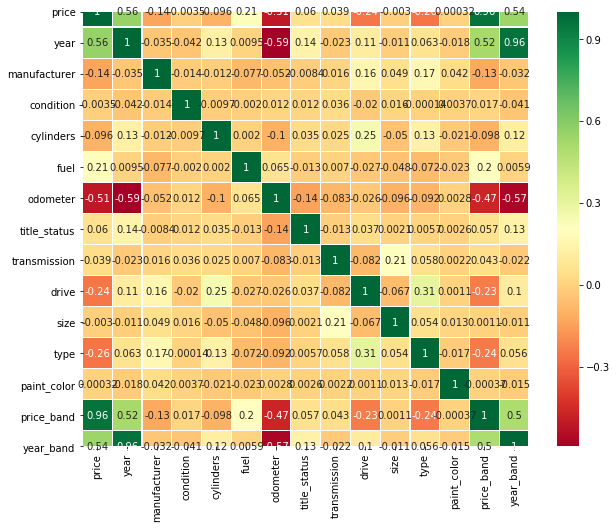

In [48]:
# Plot correlation matrix for "df_clean" dataset.

sns.heatmap(df_clean.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [49]:
# Delete the price_band and year_band columns

df_clean.drop('price_band', axis=1, inplace=True)
df_clean.drop('year_band', axis=1, inplace=True)

In [50]:
df_clean.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
3,9000,2004.0,0,0,0,0,54000.0,0,0,0,2,0,0
7,8500,2005.0,1,0,1,0,62800.0,0,0,0,2,1,1
12,2750,2006.0,0,1,2,0,165000.0,0,0,1,1,2,2
19,24930,2017.0,2,0,3,0,32989.0,0,0,1,1,3,3
26,3200,1998.0,3,1,3,0,98186.0,0,1,0,3,4,4


In [51]:
df_clean.dtypes

price             int64
year            float64
manufacturer      int64
condition         int64
cylinders         int64
fuel              int64
odometer        float64
title_status      int64
transmission      int64
drive             int64
size              int64
type              int64
paint_color       int64
dtype: object

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88821 entries, 3 to 435846
Data columns (total 13 columns):
price           88821 non-null int64
year            88821 non-null float64
manufacturer    88821 non-null int64
condition       88821 non-null int64
cylinders       88821 non-null int64
fuel            88821 non-null int64
odometer        88821 non-null float64
title_status    88821 non-null int64
transmission    88821 non-null int64
drive           88821 non-null int64
size            88821 non-null int64
type            88821 non-null int64
paint_color     88821 non-null int64
dtypes: float64(2), int64(11)
memory usage: 9.5 MB


#### Suitable Metrics

The following were the final features used in my analyses to predict the 'price' metric that this study was focused around:
- Year (the year the car was made)
- Manufacturer (brand of car, i.e. BMW, Volvo)
- Condition (excellent, good, like new, fair, new)
- Cylinders (5 cylinders, 6 cylinders, 8 cylinders, 4 cylinders, 10 cylinders, 12 cylinders, 3 cylinders)
- Fuel (gas, diesel, hybrid, other, electric)
- Odometer (the number of miles on the car)
- Title Status (clean, rebuilt, lien)
- Transmission (automatic, manual, other)
- Drive (rear-wheel drive (rwd), all-wheel drive (4wd),front-wheel drive (fwd))
- Size (compact, full-size, mid-size, sub-compact)
- Type (pickup, convertible, truck, SUV, coupe, offroad, sedan, wagon, mini-van, hatchback, van, other)
- Paint Color (red, silver, white, grey, blue, green, black, brown, yellow, custom, purple, orange)

### 3.3 Methods

I am going to be testing five different methods: normality check, multiple linear regression, multiple linear regression with interactions, decision tree modeling, and random forest modeling.

[Back to top](#Table-of-contents)

### 3.4 Analysis 

The code used for testing normality, multiple linear regression, multiple linear regression with interactions, decision tree, and random forest can be found below.


[Back to top](#Table-of-contents)

#### Checking for Normality

In [145]:
from scipy import stats

In [146]:
def assert_normality(data):
    statistic, pvalue = stats.shapiro(data)
    print("Shapiro Stat" + str(statistic) + " and p-value " + str(pvalue))
    if pvalue > 0.05:
        print("Normal")
        return True
    else:
        print("Not normal")
        return False

In [147]:
df_modelprac.apply(lambda x: assert_normality(x))

Shapiro Stat0.858588695526123 and p-value 0.0
Not normal
Shapiro Stat0.9519967436790466 and p-value 0.0
Not normal
Shapiro Stat0.8476524353027344 and p-value 0.0
Not normal
Shapiro Stat0.7682942152023315 and p-value 0.0
Not normal
Shapiro Stat0.8276485204696655 and p-value 0.0
Not normal
Shapiro Stat0.3124944567680359 and p-value 0.0
Not normal
Shapiro Stat0.9857133030891418 and p-value 0.0
Not normal
Shapiro Stat0.23754018545150757 and p-value 0.0
Not normal
Shapiro Stat0.28345823287963867 and p-value 0.0
Not normal
Shapiro Stat0.8039007186889648 and p-value 0.0
Not normal
Shapiro Stat0.7286144495010376 and p-value 0.0
Not normal
Shapiro Stat0.9244439005851746 and p-value 0.0
Not normal
Shapiro Stat0.9136128425598145 and p-value 0.0
Not normal


price           False
year            False
manufacturer    False
condition       False
cylinders       False
fuel            False
odometer        False
title_status    False
transmission    False
drive           False
size            False
type            False
paint_color     False
dtype: bool

The data does not follow a normal distribution.

#### Multiple Linear Regression

In [148]:
import numpy as np
from sklearn import linear_model
import pandas as pd

df_modelprac = df_clean

In [161]:
# Linear Regression - using odometer to predict price
X = df_modelprac[["paint_color"]]
y = df_modelprac["price"]

In [162]:
simple_prediction = linear_model.LinearRegression()
simple_prediction.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
print("Intercept : ", simple_prediction.intercept_)

Intercept :  12398.18589184007


In [164]:
print("Coefficients : ", simple_prediction.coef_)

Coefficients :  [1.28499466]


In [165]:
simple_prediction.score(X,y)

1.0191990029717601e-07

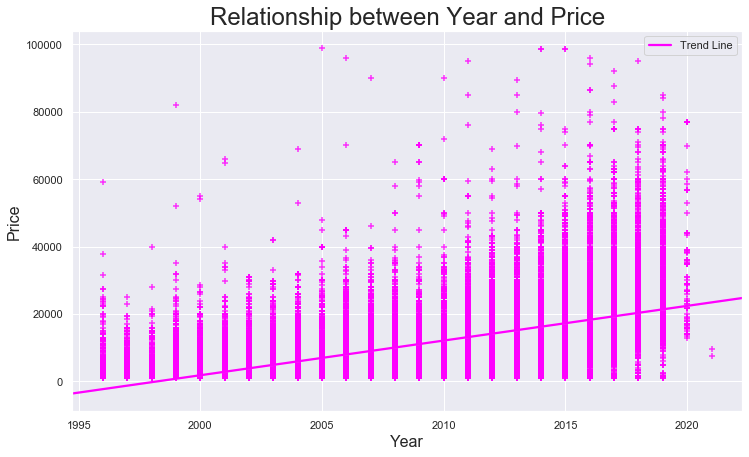

In [154]:
import seaborn as sns

# Multiple Linear Regression plot
sns.set(color_codes=True)
fig = plt.figure(figsize=(12, 7))
sns.regplot(x=df_modelprac.year, y=df_modelprac.price, color='magenta', marker='+')
plt.legend(labels=['Trend Line'])
plt.title('Relationship between Year and Price', size=24)
plt.xlabel('Year', size=16)
plt.ylabel('Price', size=16);

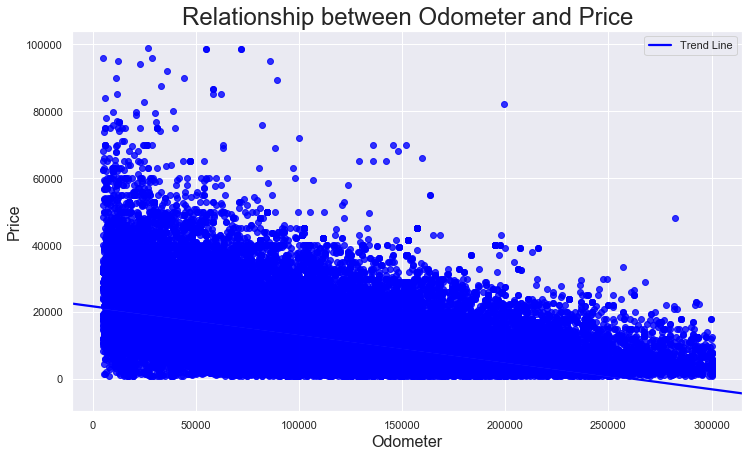

In [80]:
# Multiple Linear Regression plot
sns.set(color_codes=True)
fig = plt.figure(figsize=(12, 7))
sns.regplot(x=df_modelprac.odometer, y=df_modelprac.price, color='blue', marker='o')
plt.legend(labels=['Trend Line'])
plt.title('Relationship between Odometer and Price', size=24)
plt.xlabel('Odometer', size=16)
plt.ylabel('Price', size=16);

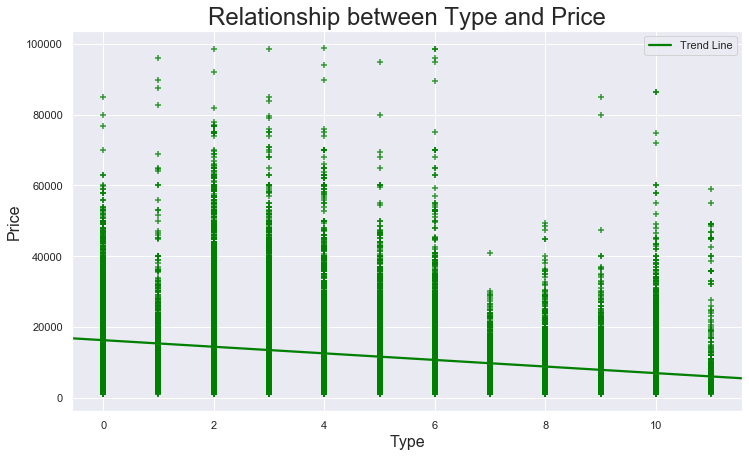

In [160]:
# Multiple Linear Regression plot
sns.set(color_codes=True)
fig = plt.figure(figsize=(12, 7))
sns.regplot(x=df_modelprac.type, y=df_modelprac.price, color='green', marker='+')
plt.legend(labels=['Trend Line'])
plt.title('Relationship between Type and Price', size=24)
plt.xlabel('Type', size=16)
plt.ylabel('Price', size=16);

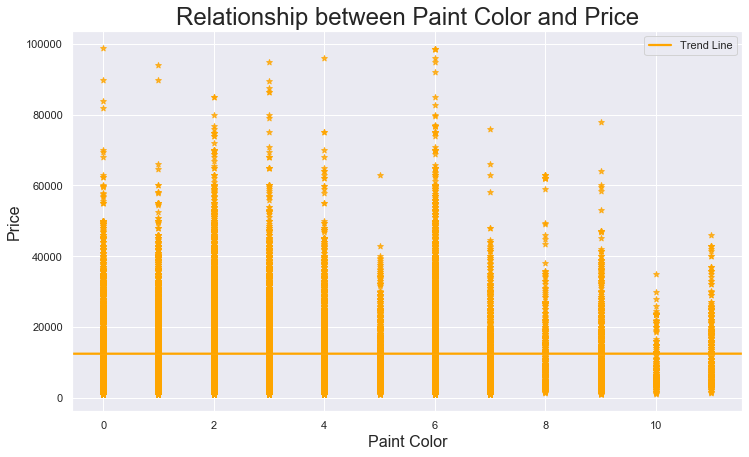

In [166]:
# Multiple Linear Regression plot
sns.set(color_codes=True)
fig = plt.figure(figsize=(12, 7))
sns.regplot(x=df_modelprac.paint_color, y=df_modelprac.price, color='orange', marker='*')
plt.legend(labels=['Trend Line'])
plt.title('Relationship between Paint Color and Price', size=24)
plt.xlabel('Paint Color', size=16)
plt.ylabel('Price', size=16);

The above code was run over and over again using different variables to attain the scores of each variable in the dataset. The following is each variable's resulting score:
- year = 0.3162207
- odometer = 0.2565765
- type = 0.0652205
- drive = 0.0594325
- fuel = 0.044463
- manufacturer = 0.0182277
- cylinders = 0.0092212
- title_status = 0.0035958
- transmission = 0.0015195
- condition = 0.0000121
- size = 0.0000091
- paint_color = 0.0000001

#### Multiple Linear Regression with Interactions

In [167]:
#Multiple linear regression with interactions - using year and drive to predict price
X = df_modelprac[["year", "drive"]]
y = df_modelprac["price"]

In [168]:
multiple_prediction = linear_model.LinearRegression()
multiple_prediction.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
print("Intercept : ", multiple_prediction.intercept_)

Intercept :  -2175446.6000281805


In [170]:
print("Coefficient : ", multiple_prediction.coef_)

Coefficient :  [ 1090.58223811 -3989.6362865 ]


In [171]:
multiple_prediction.score(X,y)

0.41080473696711256

#### OLS Multiple Model

In [172]:
import statsmodels.api as sm
X = df_modelprac[["year", "drive"]]
y = df_modelprac["price"]

In [173]:
X = sm.add_constant(X)

In [174]:
multiple_model = sm.OLS(y,X).fit()

In [175]:
multiple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                 3.096e+04
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:37:07   Log-Likelihood:            -9.1411e+05
No. Observations:               88821   AIC:                         1.828e+06
Df Residuals:                   88818   BIC:                         1.828e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.175e+06   9521.841   -228.469      0.000   -2.19e+06   -2.16e+06
year        1090.5822      4.739    230.147      0.000    1081.295    1099.870
drive      -3989.6363     33.412   -119.407      0.000   -4055.124   -3924.149
==============================================================================
Omnibus:                    39717.424   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           345842.690
Skew:                           1.946   Prob(JB):                         0.00
Kurtosis:                      11.849   Cond. No.                     8.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above code was run over and over again using different variable-pairs to attain the resulting scores below:
- year & drive = 0.41080
- year & type = 0.401015
- year & odometer = 0.36264
- odometer & type = 0.34860
- year & cylinders = 0.34454
- year & manufacturer = 0.329599
- odometer & drive = 0.32273
- year & transmission = 0.31892
- year & condition = 0.316625
- year & paint_color = 0.316328
- odometer & manufacturer = 0.282749
- odometer & cylinders = 0.278715
- odometer & condition = 0.25658
- odometer & paint_color = 0.25658
- condition & type = 0.06523
- condition & drive = 0.0595

#### Decision Tree

In [203]:
y = df_clean.price.values

In [204]:
X = df_clean.drop(["price"], axis=1)

In [205]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [206]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure

In [207]:
# Accurary results = 0.3096538

model=DecisionTreeClassifier()
model= model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Decision Tree is 0.3101041373487194


#### Random Forest

In [110]:
# Accurary results = 0.3098227 @ n_estimators = 10
# Accurary results = 0.3128624 @ n_estimators = 20

model=RandomForestClassifier(n_estimators=10) # test for different values
model.fit(X_train,y_train)
prediction6=model.predict(X_test)
print('The accuracy of the Random Forest is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the Random Forest is 0.3098226850548832


### 3.5 Results

Normality:
My final cleaned dataset was not found to be normal. Future steps for a study like this would be to explore new datasets or to conduct thorough studies that would result in normally distributed data on which to run these tests. While none of the results for these five tests show high statistical significance, the results of the tests are relatively significant to each other, and do suggest which variables are more helpful in predicting price for used cars. 

Multiple Linear Regression: 
This was an excellent place to begin in order to show the causal relationships between each of the different features and price. The results showed that 'year' had the most significant causal relationship (score = 0.316) to a car's listing price, followed fairly closely by 'odometer' (score = 0.257). There was a steep drop down to the next causal relationships, with only very slight significance from 'type' (score = 0.065), 'drive' (score = 0.059), and 'fuel' (score = 0.044), in that order of importance.

Multiple Linear Regression with Interactions: 
This regression was very helpful in showing how the variables together influenced a vehicle's listing price, and there was an increase in significance when combining certain factors. The 'year' and 'drive' of a car showed the highest significance in causal relationship (score = 0.411), followed very closely by 'year' and 'type' (score = 0.401). I was interested to find that the two features, 'year' and 'odometer', with the highest scores in the multiple linear regressions, did not have the highest score when combined together for multiple linear regression with interactions (score = 0.363).

Decision Tree & Random Forest: 
It makes sense that these two models have almost identical accuracy scores for their ability to predict price from the other variables in the dataset (decision tree = 0.30965; random forest (n_estimators=10) = 0.309823). This is because a random forest model uses many decision tree classifiers to sample subsets of the data and utilizes averaging in order to improve accuracy and not over-fit the model. These models worked well on this dataset due to the data not being normalized. 


[Back to top](#Table-of-contents)

## Conclusion

Modeling the data using multiple linear regression with interactions produced the most significant results with the highest accuracy scores, and the top three combinations of factors makes logical sense following 

This study showed the top four variables that influence the price of a car are the year, odometer reading, type, and drivetrain. Initially I thought that year and odometer would be more closely related, but the results show this is not strictly the case. While year is the age of the car, odometer illustrates how often the owner drives the car, and is not necessarily linked to the car's age. The older the vehicle, the likelihood of a lower price increases. The higher the odometer reading, the likelihood of a lower price increases. The combination of an older vehicle with a high odometer reading also are correlated to a lower price, but the relationship between these two are not as significant as the year and drivetrain, and the year and type.

The strong relationship between price and type and drivetrain show that people value these qualities and probably have set ideas in their minds of what they want when purchasing a used vehicle. Most people know if they are looking to purchase a convertible, and will likely not be swayed into purchasing an SUV or offroading vehicle. This is the same kind of logic for drivetrain, in that most people know if they need the added stability and power of an all-wheel drive vehicle versus a front-wheel or a rear-wheel drive car.

The strongest, one individual factor that affects a vehicle's listing price is the year of the car. Cars tend to breakdown with age, wear, and tear, so the newer a vehicle is, the more expensive it is likely to be.



[Back to top](#Table-of-contents)

## References

- (Kaggle) https://www.kaggle.com/austinreese/craigslist-carstrucks-data?select=vehicles.csv
- (Towards Data Science) https://towardsdatascience.com/predicting-used-car-prices-with-machine-learning-techniques-8a9d8313952
- (Montway) https://www.montway.com/blog/best-sites-buy-sell-used-cars/
- (Fool) https://www.fool.com/retirement/2017/08/14/8-expenses-that-account-for-87-of-the-average-hous.aspx
- (Bloomberg) https://www.bloomberg.com/news/articles/2015-04-17/a-pew-survey-charts-global-car-motorcycle-and-bike-ownership#:~:text=About%2088%20percent%20of%20Americans%20owned%20cars%E2%80%94second%20in%20the%20world



[Back to top](#Table-of-contents)